In [1]:
from orderbookmdp.rl.level_2_data import get_level_2_sequence

init_funds = 100000
T = 10000
takerfee = 0.002
print('Creates level 2 sequences')

lvl2_seqs = get_level_2_sequence(T, init_funds, order_path='../python-orderbookmdp/data/feather/',
                                snapshot_path='../python-orderbookmdp/data/snap_json/')

Creates level 2 sequences


/home/olle/miniconda3/envs/orderbookmdp/lib/python3.6/site-packages/pandas/io/feather_format.py:112: FutureWarning:

`nthreads` argument is deprecated, pass `use_threads` instead

/home/olle/miniconda3/envs/orderbookmdp/lib/python3.6/site-packages/pandas/io/feather_format.py:112: FutureWarning:

`nthreads` argument is deprecated, pass `use_threads` instead



In [2]:
data = []
for depth in lvl2_seqs:
    time = depth[0]
    pl = depth[1]
    for p,s in pl['buy']:
        data.append([time, p, s, 'buy'])
    for p,s in pl['sell']:
        data.append([time,p,s,'sell'])

In [3]:
import pandas as pd
df = pd.DataFrame(data, columns=['time','price','size','side'])
df.time = pd.to_datetime(df.time)
df.head()

,time,price,size,side
0,2018-03-24 08:38:14.983,8890.69,9.183823,buy
1,2018-03-24 08:38:14.983,8890.60,0.001000,buy
2,2018-03-24 08:38:14.983,8886.94,0.087114,buy
3,2018-03-24 08:38:14.983,8886.60,0.010000,buy
4,2018-03-24 08:38:14.983,8886.38,0.004000,buy


In [4]:
(df.time.min(), df.time.max())

(Timestamp('2018-03-24 08:38:14.983000'),
 Timestamp('2018-03-24 14:44:59.472000'))

In [5]:
df.drop_duplicates(subset=['time','price'], inplace=True)

In [6]:
df.head()

,time,price,size,side
0,2018-03-24 08:38:14.983,8890.69,9.183823,buy
1,2018-03-24 08:38:14.983,8890.60,0.001000,buy
2,2018-03-24 08:38:14.983,8886.94,0.087114,buy
3,2018-03-24 08:38:14.983,8886.60,0.010000,buy
4,2018-03-24 08:38:14.983,8886.38,0.004000,buy


In [7]:
pivot = df[['time','price','size']].pivot('price', 'time', 'size')
pivot.sort_index(ascending=False, inplace=True)

In [8]:
pivot.shape

(23472, 9951)

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
pivot.loc[::5, ::5].fillna(0).shape

(4695, 1991)

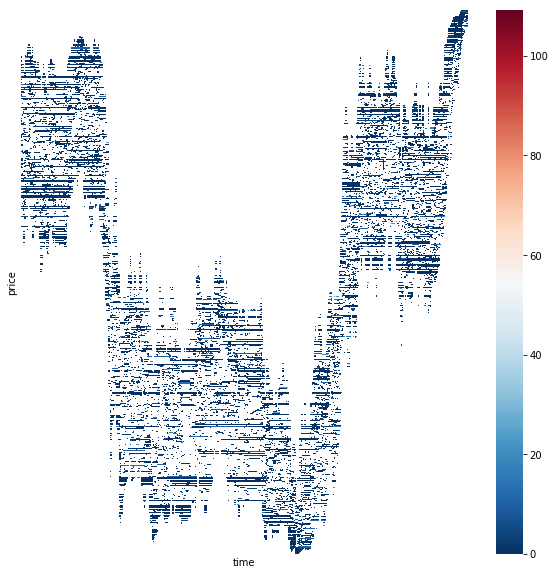

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(pivot.loc[::5, ::5], xticklabels=False, yticklabels=False, vmin=0,
           cmap='RdBu_r');

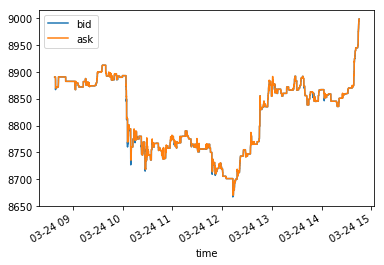

In [27]:
bid = df[df.side == 'buy'].groupby('time').max()['price']
ask = df[df.side == 'sell'].groupby('time').min()['price']
bid.name ='bid'
ask.name = 'ask'
temp = pd.concat([bid ,ask], axis=1)
temp.plot();